In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

import dask.dataframe as dd
from pathlib import Path
import glob

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import colors
import soundfile as sf
import matplotlib.patches as patches

In [2]:
import sys

sys.path.append("../src")

In [3]:
import data_handling as dh
import subsampling as ss
from core import SITE_NAMES, FREQ_GROUPS

from cli import get_file_paths
import plotting
import pipeline

In [4]:
type_key = 'lf_'
site_key = "Central"
cycle_lengths = [1800, 360]
percent_ons = [0.1667]
specific_dc_tag = "1800of1800"

In [5]:
pipeline_params = dict()
pipeline_params["read_csv"] = False
pipeline_params["save_activity_grid"] = True
pipeline_params["save_presence_grid"] = True
pipeline_params["save_dc_night_comparisons"] = True
pipeline_params["save_activity_dc_comparisons"] = True
pipeline_params["save_presence_dc_comparisons"] = True
pipeline_params["show_plots"] = False
pipeline_params["show_PST"] = True
pipeline_params

{'read_csv': False,
 'save_activity_grid': True,
 'save_presence_grid': True,
 'save_dc_night_comparisons': True,
 'save_activity_dc_comparisons': True,
 'save_presence_dc_comparisons': True,
 'show_plots': False,
 'show_PST': True}

In [6]:
data_params = dict()
data_params["site_name"] = SITE_NAMES[site_key]
data_params["site_tag"] = site_key
data_params["type_tag"] = type_key
data_params["freq_tags"] = FREQ_GROUPS[type_key]
data_params["cycle_lengths"] = cycle_lengths
data_params["percent_ons"] = percent_ons
dc_tags = ss.get_list_of_dc_tags(data_params["cycle_lengths"], data_params["percent_ons"])
data_params["dc_tags"] = dc_tags
data_params["cur_dc_tag"] = specific_dc_tag
data_params['resolution_in_min'] = '30'
data_params['recording_start'] = '03:00'
data_params['recording_end'] = '13:30'
data_params

{'site_name': 'Central Pond',
 'site_tag': 'Central',
 'type_tag': 'lf_',
 'freq_tags': [13000, 43000],
 'cycle_lengths': [1800, 360],
 'percent_ons': [0.1667],
 'dc_tags': ['1800of1800', '300of1800', '60of360'],
 'cur_dc_tag': '1800of1800',
 'resolution_in_min': '30',
 'recording_start': '03:00',
 'recording_end': '13:30'}

In [7]:
file_paths = get_file_paths(data_params)
file_paths

{'raw_SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/raw/Central',
 'SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Central',
 'bd2_TYPE_SITE_YEAR': 'bd2__lf_Central_2022',
 'duty_cycled_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Central/duty_cycled',
 'dc_dets_TYPE_SITE_summary': 'dc_dets__lf_Central_summary',
 'dc_bouts_TYPE_SITE_summary': 'dc_bouts__lf_Central_summary',
 'simulated_schemes_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Central/duty_cycled/simulated_schemes',
 'figures_SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../figures/Central',
 'activity_det_comparisons_figname': 'activity_det_comparisons_per_dc_LF_Central',
 'dc_det_comparisons_figname': 'dc_det_comparisons_per_night_LF_Central',
 'activity_bout_comparisons_figname': 'activity_bout_comparisons_per_dc_LF_Central',
 'dc_bout_comparisons_figname'

In [8]:
activity_arr = pipeline.run_for_dets(data_params, pipeline_params, file_paths)

In [9]:
dh.construct_activity_grid_for_number_of_dets(activity_arr, "1800of1800")

Date (UTC)  07/26/22  07/27/22  07/28/22  07/29/22  07/30/22  07/31/22  \
Time (UTC)                                                               
03:00            1.0       3.0       0.0       2.0       0.0       0.0   
03:30            0.0       0.0       0.0       1.0       0.0       2.0   
04:00            1.0       2.0       1.0       1.0       0.0       0.0   
04:30          147.0       0.0       3.0     145.0      51.0     268.0   
05:00         1556.0     311.0     176.0    1317.0     714.0     828.0   
05:30         1143.0     284.0     268.0     341.0     247.0     755.0   
06:00          546.0     170.0     155.0     124.0     137.0      21.0   
06:30          323.0      96.0      29.0      90.0     289.0     349.0   
07:00           94.0     184.0     477.0      46.0     546.0      55.0   
07:30          103.0    1208.0      99.0     382.0     136.0       2.0   
08:00           34.0    1162.0      52.0     550.0     313.0     137.0   
08:30           22.0     751.0     118.0     124.0     150.0      26.0   
09:00           43.0      72.0      46.0     168.0      26.0     331.0   
09:30          113.0      35.0      18.0     199.0      11.0     121.0   
10:00          178.0     362.0     308.0     234.0     189.0      33.0   
10:30          174.0      64.0      55.0     452.0     343.0     123.0   
11:00           35.0     141.0      63.0     100.0      21.0     221.0   
11:30            5.0      30.0      20.0      46.0     379.0      12.0   
12:00            0.0       0.0       1.0       0.0     147.0      24.0   
12:30            1.0       1.0       1.0       0.0       1.0       1.0   
13:00            0.0       0.0       1.0       0.0       1.0       0.0   

Date (UTC)  08/01/22  08/02/22  08/03/22  08/04/22  ...  08/23/22  08/24/22  \
Time (UTC)                                          ...                       
03:00            0.0       0.0       0.0       0.0  ...       0.0       0.0   
03:30            1.0       0.0       1.0       0.0  ...      89.0     143.0   
04:00            1.0       0.0       1.0      45.0  ...     432.0     129.0   
04:30           42.0     197.0      44.0    2072.0  ...     352.0      23.0   
05:00          241.0     402.0      29.0    3307.0  ...      29.0      50.0   
05:30           84.0    1702.0      20.0    1725.0  ...      27.0       6.0   
06:00          311.0    1930.0      12.0    1317.0  ...      40.0      24.0   
06:30           76.0    1736.0      22.0     452.0  ...      86.0       5.0   
07:00           80.0    1612.0      21.0     433.0  ...       0.0       4.0   
07:30           26.0    1141.0       7.0     114.0  ...      22.0       1.0   
08:00            8.0     645.0      52.0     185.0  ...       6.0       3.0   
08:30           42.0     799.0     229.0      79.0  ...       0.0       0.0   
09:00           56.0     809.0     199.0       5.0  ...       0.0      26.0   
09:30          121.0     169.0      86.0       0.0  ...       0.0       0.0   
10:00          106.0     128.0      68.0       0.0  ...       2.0       0.0   
10:30           67.0      44.0      39.0       1.0  ...       1.0       0.0   
11:00          219.0      45.0       0.0       0.0  ...       0.0       2.0   
11:30           38.0      24.0       0.0       0.0  ...       0.0       0.0   
12:00            4.0       0.0       0.0       0.0  ...      18.0       0.0   
12:30            3.0       1.0       0.0       0.0  ...       0.0     121.0   
13:00            1.0       0.0       0.0       0.0  ...       2.0       0.0   

Date (UTC)  08/25/22  08/26/22  08/27/22  08/28/22  08/29/22  08/30/22  \
Time (UTC)                                                               
03:00            1.0       0.0       0.0       0.0       0.0       0.0   
03:30           94.0     327.0     688.0     408.0     706.0     403.0   
04:00          150.0     503.0     388.0     176.0      42.0      33.0   
04:30           33.0    2199.0     347.0     207.0      80.0      89.0   
05:00            0.0     305.0     

In [10]:
activity_arr[-21:]

Number_of_Detections (1800of1800)  \
Date_and_Time_UTC                                        
2022-09-01 03:00:00                              545.0   
2022-09-01 03:30:00                             1407.0   
2022-09-01 04:00:00                             1651.0   
2022-09-01 04:30:00                             1401.0   
2022-09-01 05:00:00                              740.0   
2022-09-01 05:30:00                              547.0   
2022-09-01 06:00:00                              417.0   
2022-09-01 06:30:00                              129.0   
2022-09-01 07:00:00                              139.0   
2022-09-01 07:30:00                               47.0   
2022-09-01 08:00:00                               22.0   
2022-09-01 08:30:00                               22.0   
2022-09-01 09:00:00                                0.0   
2022-09-01 09:30:00                                0.0   
2022-09-01 10:00:00                                0.0   
2022-09-01 10:30:00                               67.0   
2022-09-01 11:00:00                                0.0   
2022-09-01 11:30:00                                0.0   
2022-09-01 12:00:00                                0.0   
2022-09-01 12:30:00                                0.0   
2022-09-01 13:00:00                                0.0   

                     Number_of_Detections (300of1800)  \
Date_and_Time_UTC                                       
2022-09-01 03:00:00                               0.0   
2022-09-01 03:30:00                             508.0   
2022-09-01 04:00:00                             239.0   
2022-09-01 04:30:00                             278.0   
2022-09-01 05:00:00                             162.0   
2022-09-01 05:30:00                              81.0   
2022-09-01 06:00:00                              78.0   
2022-09-01 06:30:00                              20.0   
2022-09-01 07:00:00                              27.0   
2022-09-01 07:30:00                               0.0   
2022-09-01 08:00:00                               0.0   
2022-09-01 08:30:00                               0.0   
2022-09-01 09:00:00                               0.0   
2022-09-01 09:30:00                               0.0   
2022-09-01 10:00:00                               0.0   
2022-09-01 10:30:00                               0.0   
2022-09-01 11:00:00                               0.0   
2022-09-01 11:30:00                               0.0   
2022-09-01 12:00:00                               0.0   
2022-09-01 12:30:00                               0.0   
2022-09-01 13:00:00                               0.0   

                     Number_of_Detections (60of360)  
Date_and_Time_UTC                                    
2022-09-01 03:00:00                             0.0  
2022-09-01 03:30:00                           394.0  
2022-09-01 04:00:00                           362.0  
2022-09-01 04:30:00                            75.0  
2022-09-01 05:00:00                           153.0  
2022-09-01 05:30:00                            71.0  
2022-09-01 06:00:00                            95.0  
2022-09-01 06:30:00                             6.0  
2022-09-01 07:00:00                             1.0  
2022-09-01 07:30:00                             9.0  
2022-09-01 08:00:00                            12.0  
2022-09-01 08:30:00                             5.0  
2022-09-01 09:00:00                             0.0  
2022-09-01 09:30:00                             0.0  
2022-09-01 10:00:00                             0.0  
2022-09-01 10:30:00                             0.0  
2022-09-01 11:00:00                             0.0  
2022-09-01 11:30:00                             0.0  
2022-09-01 12:00:00                             0.0  
2022-09-01 12:30:00                             0.0  
2022-09-01 13:00:00                             0.0

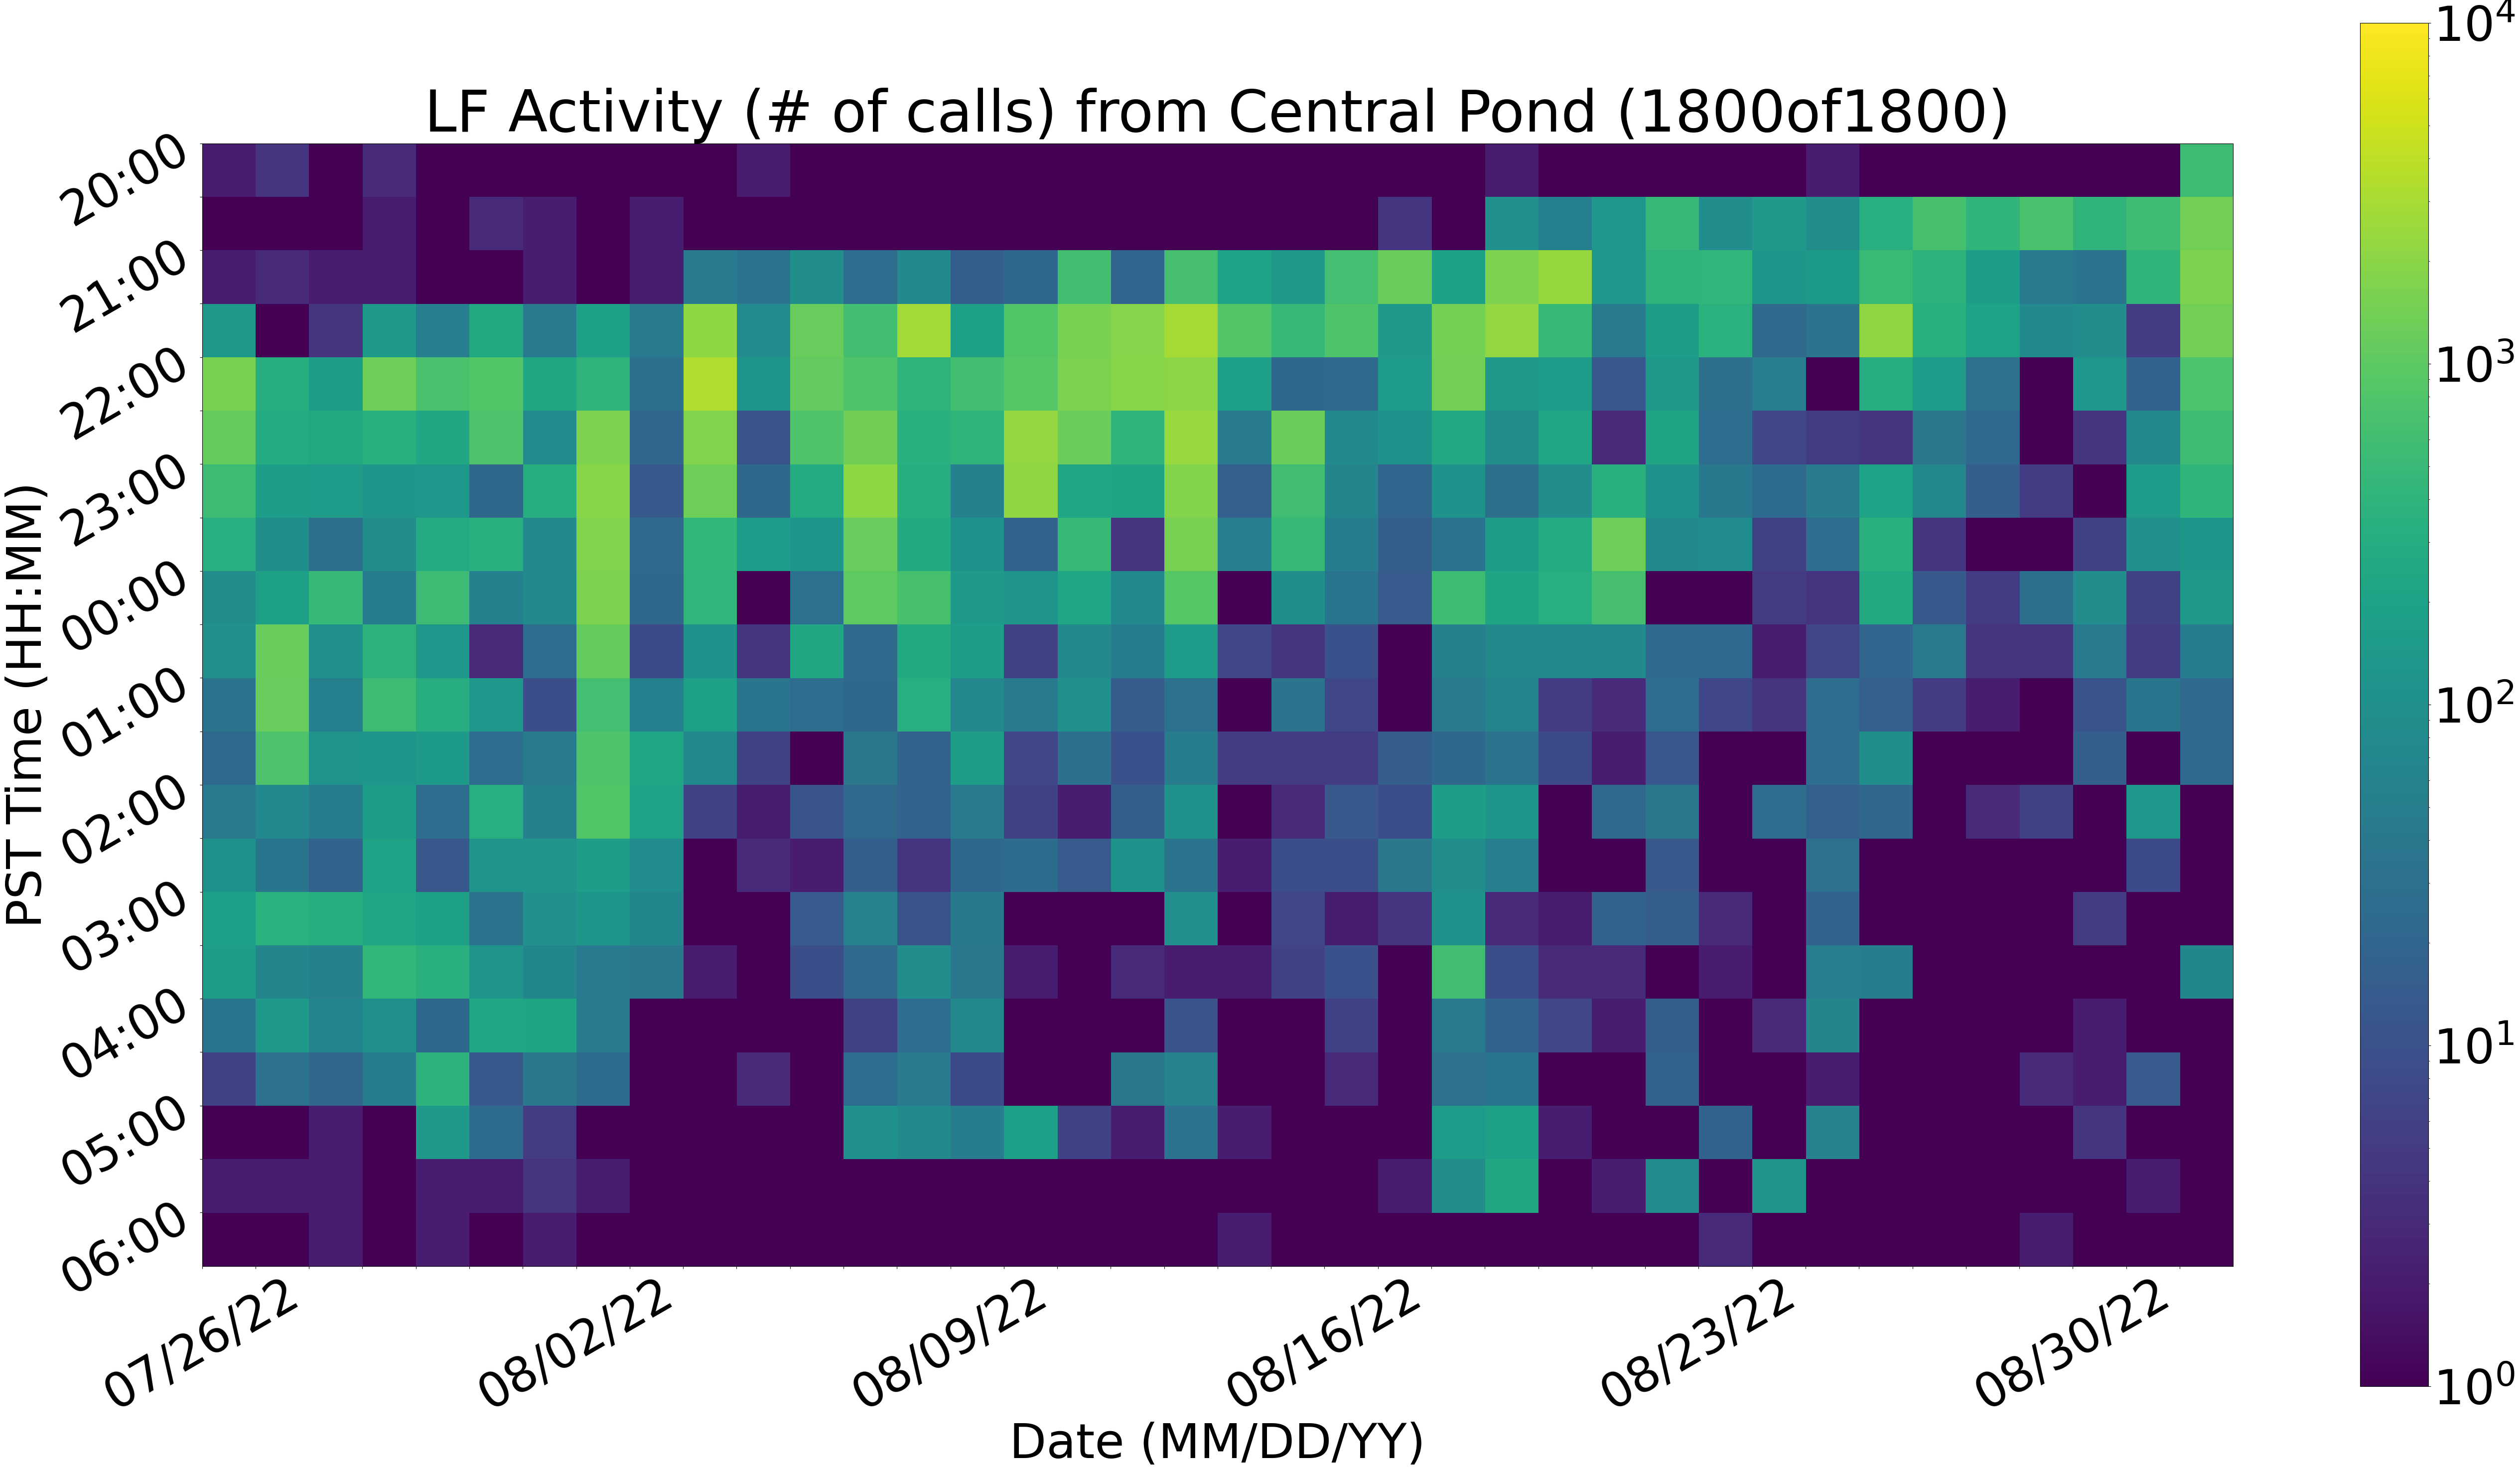

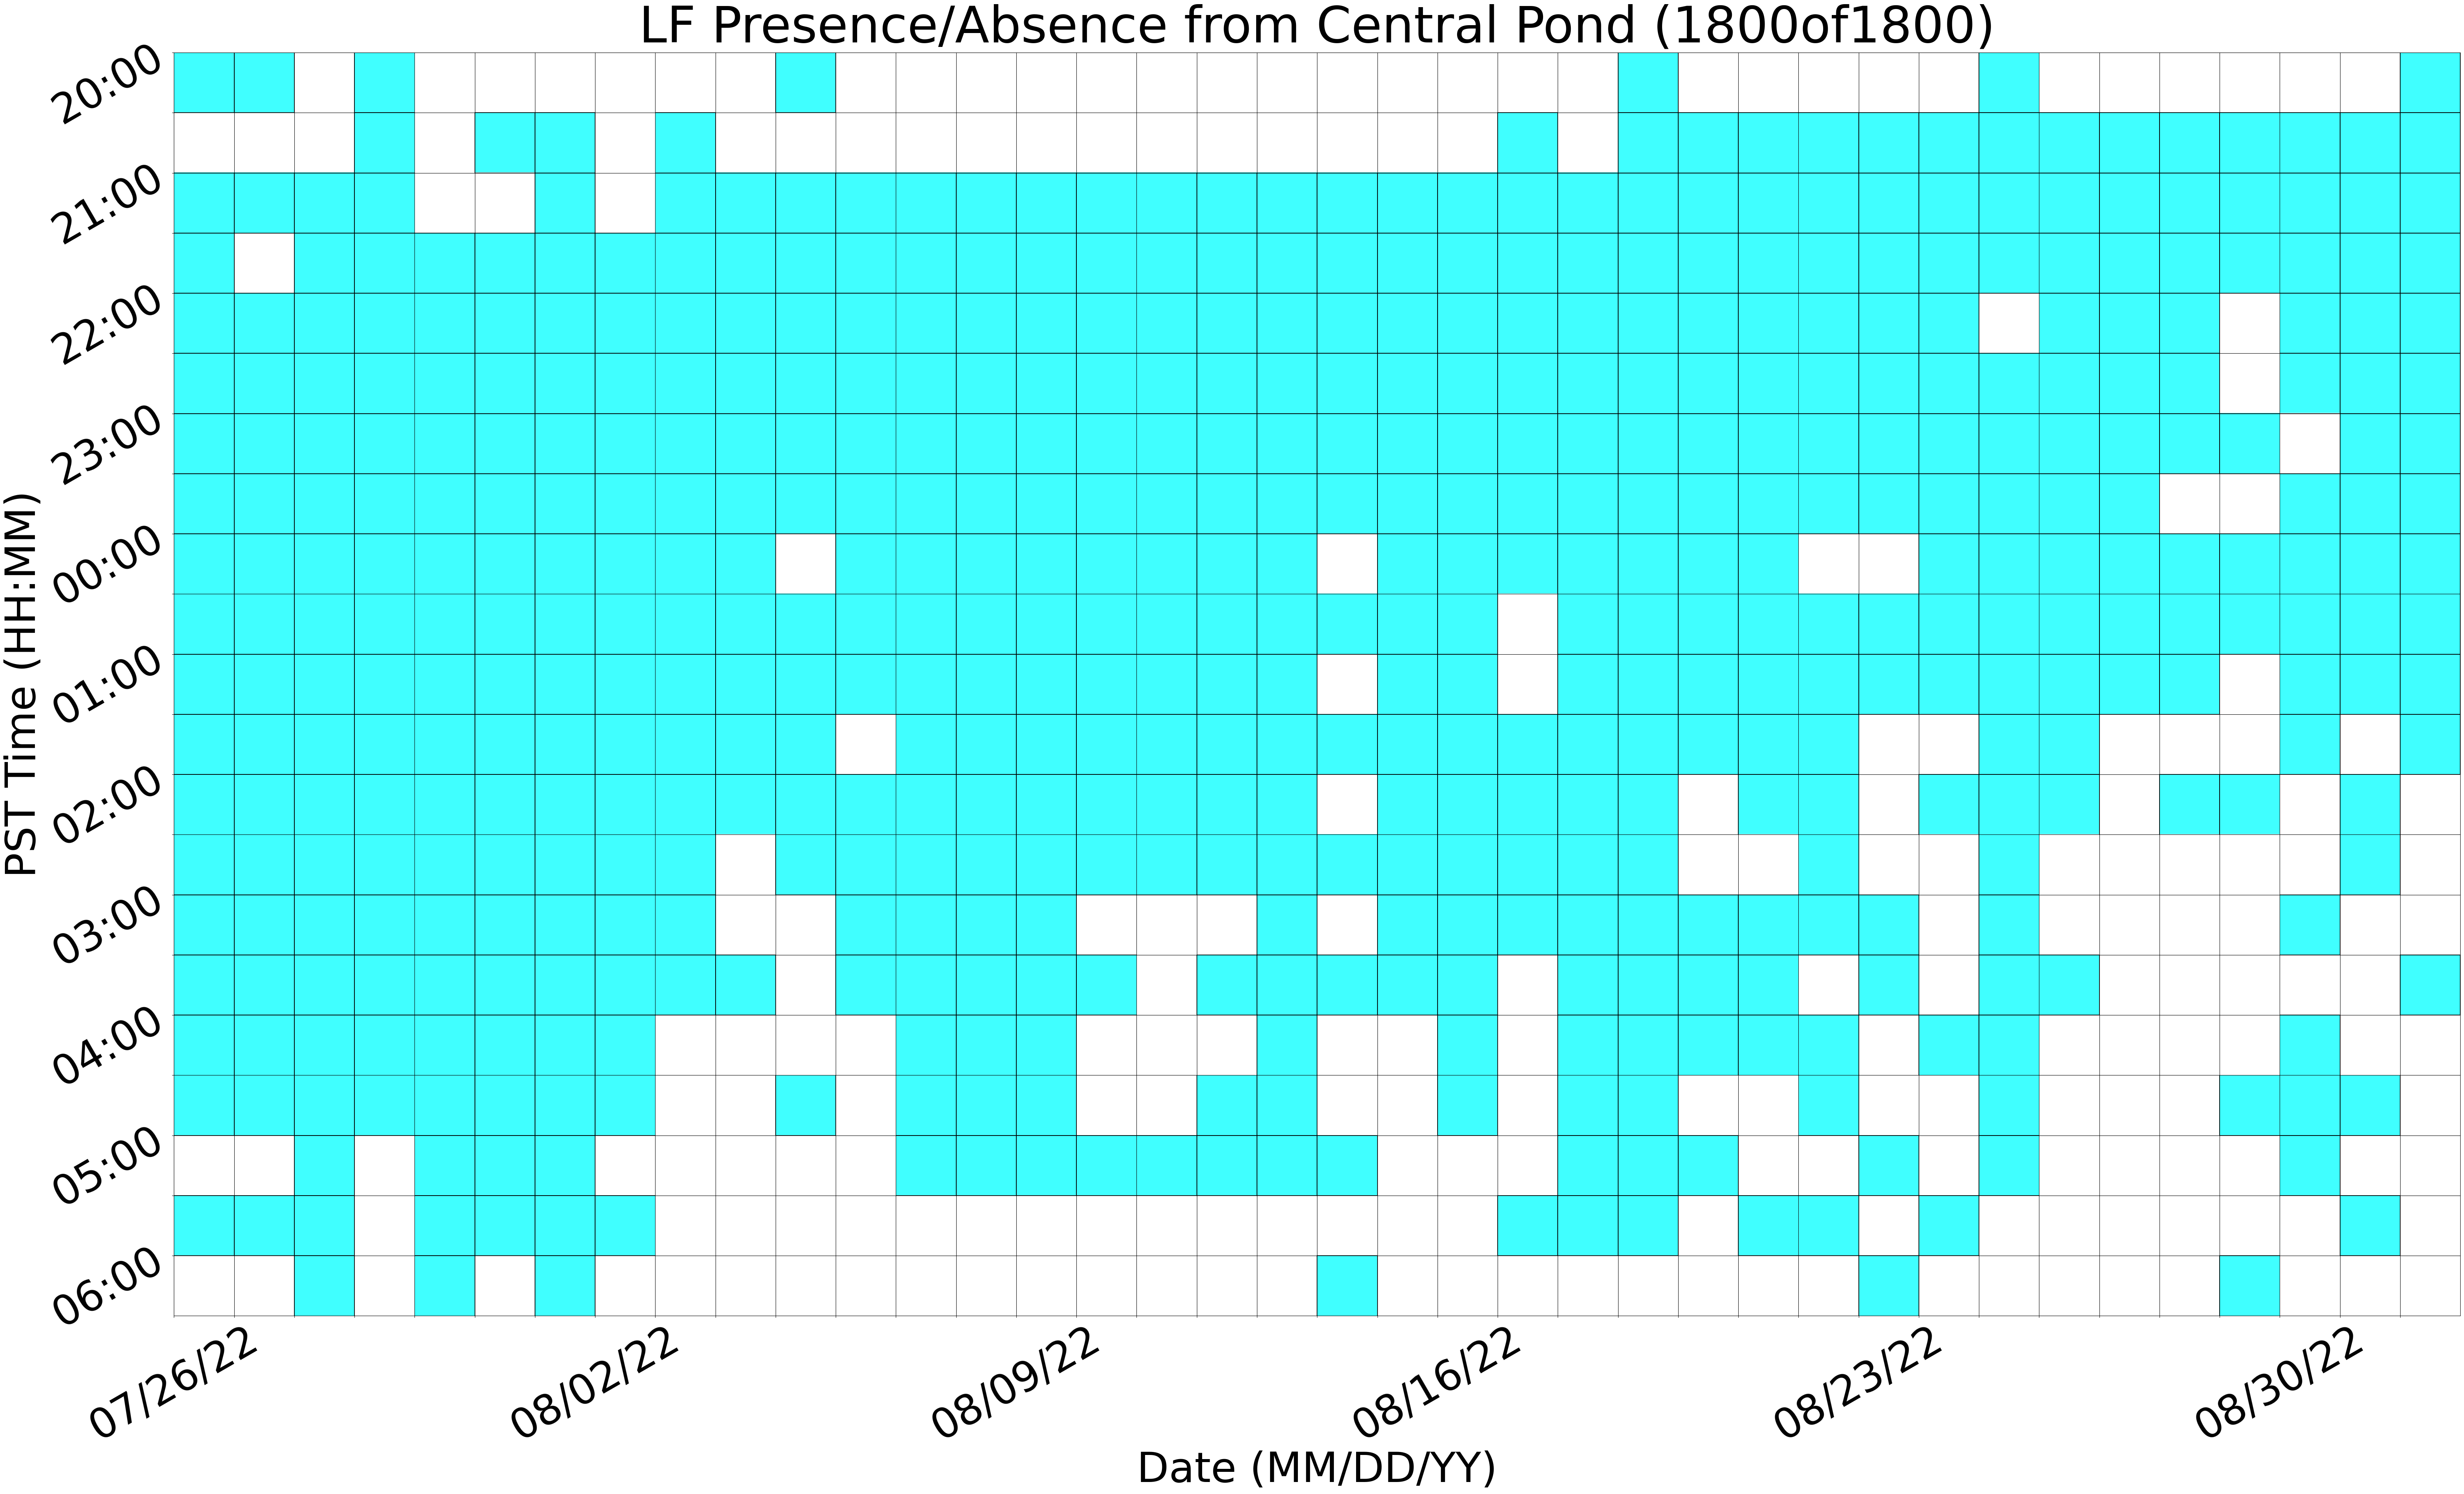

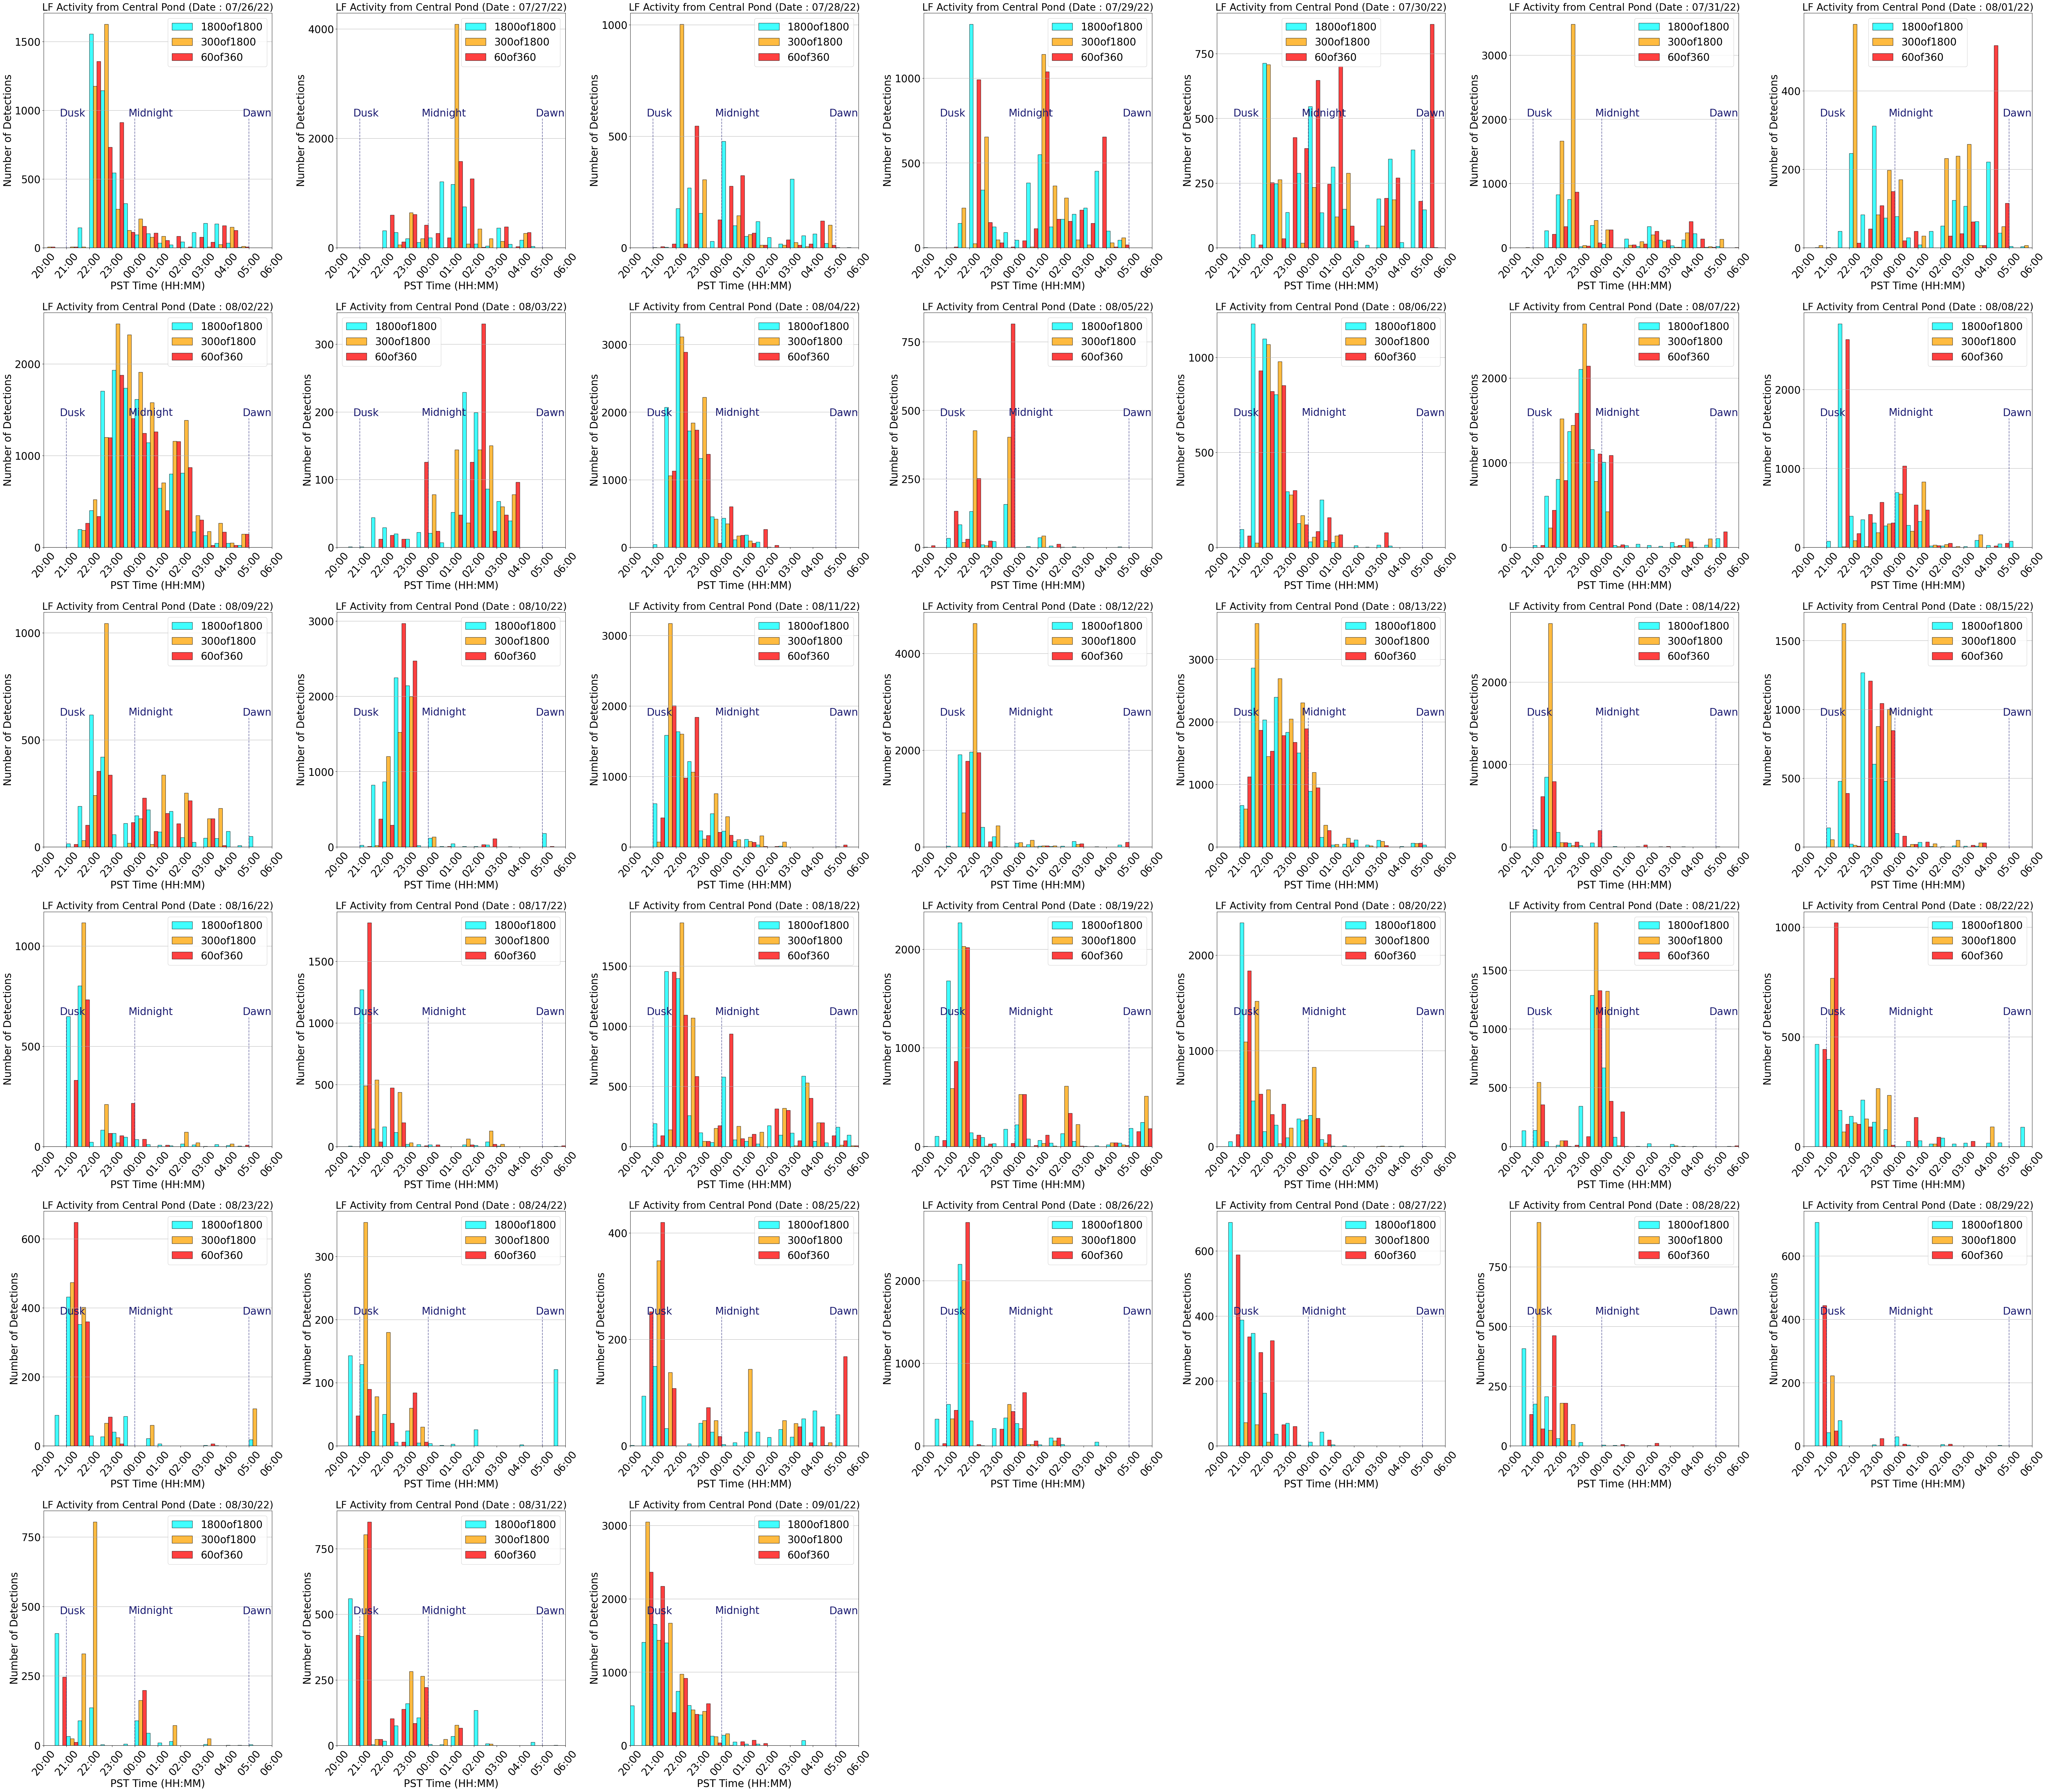

In [11]:
pipeline.plot(activity_arr, data_params, pipeline_params, file_paths)